# Import Library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import keras
import matplotlib.pyplot as plt
import nltk
from keras.preprocessing.sequence import pad_sequences
nltk.download('punkt')
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
import nltk
nltk.download('stopwords')
from keras.callbacks import EarlyStopping


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shubh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shubh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Load the Dataset

In [2]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df = df[['v1','v2']]
df.rename(columns={'v1':'label', 'v2':'message'}, inplace=True)

In [4]:
df.shape

(8081, 2)

In [5]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df.describe()

,label,message
count,8081,8081
unique,2,7123
top,ham,"Sorry, I'll call later"
freq,4825,30


In [7]:
df.groupby('label').describe().T

label                              ham           spam
message count                     4825           3256
        unique                    4516           2607
        top     Sorry, I'll call later  Subject: \r\n
        freq                        30             15

In [8]:
dataset_info = {
    'Number of Rows': len(df),
    'Number of Columns': len(df.columns),
    'Column Names': df.columns.tolist(),
    'Data Types': df.dtypes,
    'Missing Values': df.isnull().sum(),
    'Unique Values per Column': df.nunique(),
}

print("Dataset Information:")
for key, value in dataset_info.items():
    print(f"{key}: {value}")

Dataset Information:
Number of Rows: 8081
Number of Columns: 2
Column Names: ['label', 'message']
Data Types: label      object
message    object
dtype: object
Missing Values: label      0
message    0
dtype: int64
Unique Values per Column: label         2
message    7123
dtype: int64


# Visualize ham or spam message using wordcloud

### The WordCloud of the ‘ham’ message:

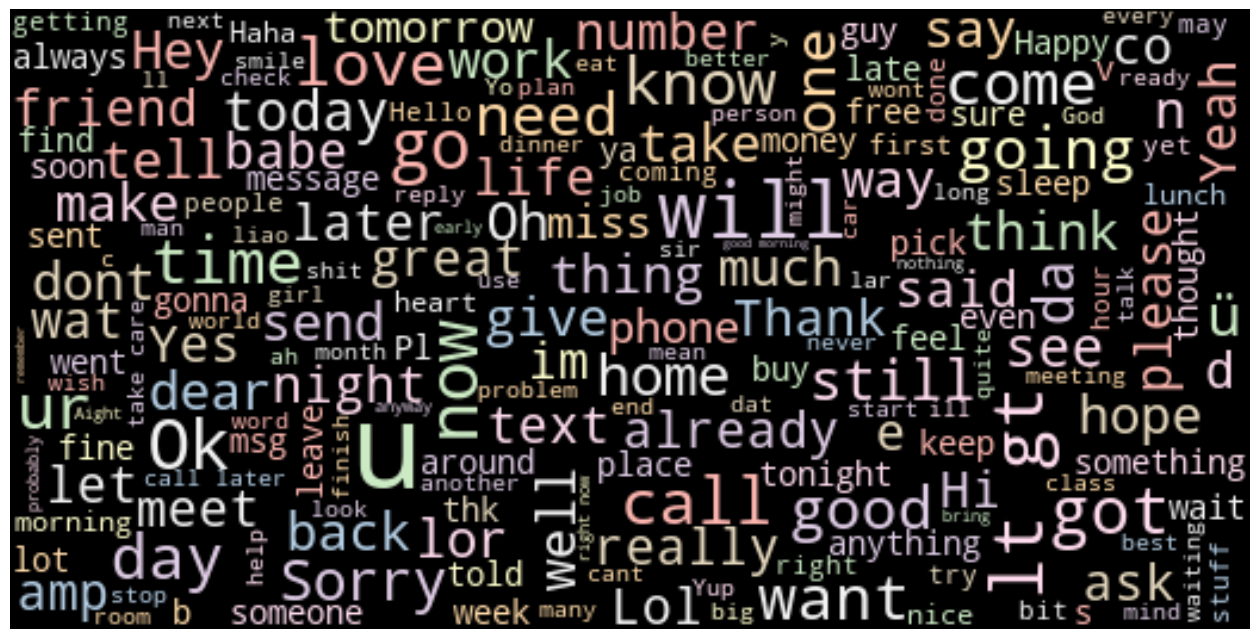

In [9]:
ham_messages = df[df['label'] == 'ham']['message'] # Separate ham messages
ham_msg_text = " ".join(ham_messages) # Join the ham and spam messages

ham_msg_cloud = WordCloud(width =520, height =260, stopwords = STOPWORDS, max_font_size = 50, background_color = "black", colormap = 'Pastel1').generate(ham_msg_text)
plt.figure(figsize=(16,10))
plt.imshow(ham_msg_cloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

### The WordCloud of the ‘spam’ message:

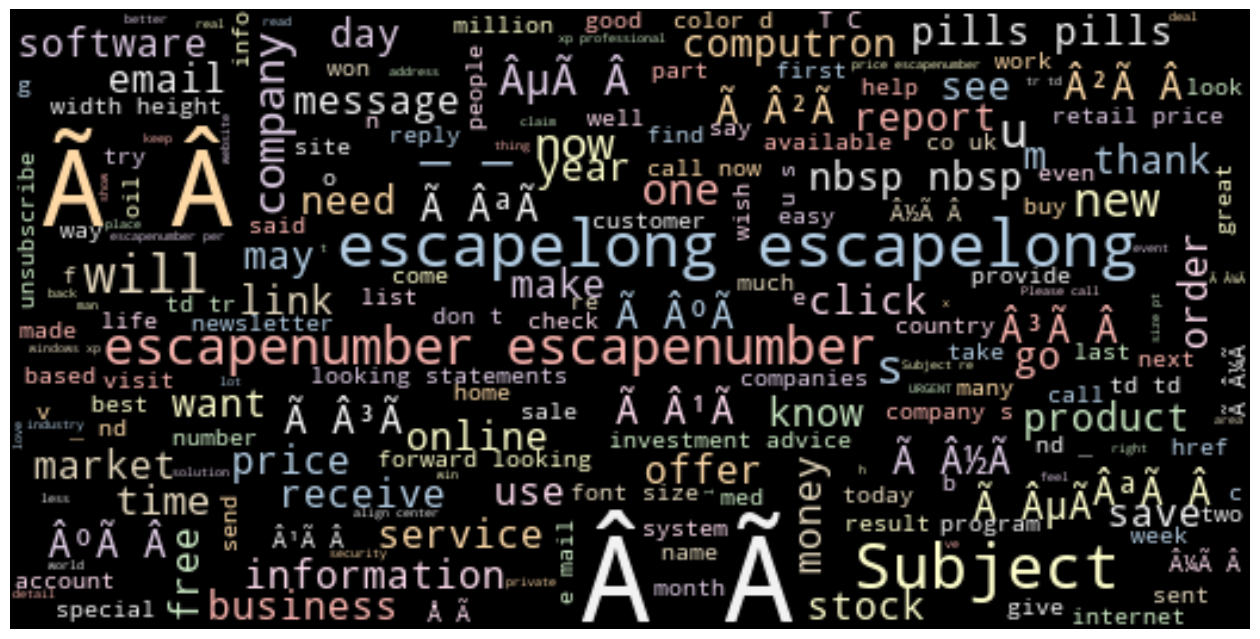

In [10]:
spam_messages = df[df['label'] == 'spam']['message'] # Separate spam messages
spam_msg_text = " ".join(spam_messages) # Join the ham and spam messages

spam_msg_cloud = WordCloud(width =520,
                          height =260,
                          stopwords=STOPWORDS,
                          max_font_size=50,
                          background_color ="black",
                         colormap='Pastel1').generate(spam_msg_text)
plt.figure(figsize=(16,10))
plt.imshow(spam_msg_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [11]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Text preprocessing

#### Get length column for each text and convert the text label to numeric value:

In [12]:
import numpy as np

# Check for NaN values in the 'message' column and replace them with an empty string
df['message'] = df['message'].replace(np.nan, '', regex=True)

# Apply the len() function to calculate text lengths
df['text_length'] = df['message'].apply(len)

# Now, you can proceed with the rest of your code
df['msg_type'] = df['label'].map({'ham': 0, 'spam': 1})
msg_label = df['msg_type'].values
df.head()


,label,message,text_length,msg_type
0,ham,"Go until jurong point, crazy.. Available only ...",111,0
1,ham,Ok lar... Joking wif u oni...,29,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,1
3,ham,U dun say so early hor... U c already then say...,49,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,0


#### Tokenization

In [13]:
max_len = 50
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'
vocab_size = 500

In [14]:
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=vocab_size, char_level=False, oov_token=oov_tok)
tokenizer.fit_on_texts(df['message'])  # Tokenizing based on 'message' column in the DataFrame 'df'

word_index = tokenizer.word_index
total_words = len(word_index)
print(f"Total words: {total_words}")


Total words: 51545


In [15]:
x_train, x_test, y_train, y_test = train_test_split(df['message'], df['msg_type'], test_size=0.2, random_state=434)

In [16]:
print(word_index)

{'<OOV>': 1, 'the': 2, '\r': 3, 'to': 4, 'and': 5, 'a': 6, 'of': 7, 'you': 8, 'in': 9, 'for': 10, 'i': 11, 'is': 12, 'your': 13, 'this': 14, 'with': 15, 'on': 16, 'that': 17, 'it': 18, 'or': 19, 'be': 20, 'escapenumber': 21, 'are': 22, "'": 23, 'have': 24, 'we': 25, 'subject': 26, 'u': 27, 'not': 28, 'as': 29, '2': 30, 'from': 31, 'our': 32, 's': 33, 'me': 34, 'escapelong': 35, '3': 36, 'all': 37, 'at': 38, 'no': 39, 'will': 40, 'my': 41, 'http': 42, 'can': 43, 'now': 44, 'if': 45, 'call': 46, 'get': 47, 'by': 48, '1': 49, '4': 50, 'only': 51, 'com': 52, 'but': 53, 'do': 54, 'free': 55, 'an': 56, 'www': 57, 'company': 58, 'e': 59, 'so': 60, 'just': 61, 'up': 62, 'more': 63, 'out': 64, 'new': 65, 'any': 66, 'here': 67, 'was': 68, 'has': 69, 'please': 70, 't': 71, '0': 72, 'one': 73, 'time': 74, 'price': 75, 'd': 76, 'its': 77, 'what': 78, '5': 79, 'us': 80, 'ur': 81, 'may': 82, 'go': 83, 'about': 84, 'like': 85, 'email': 86, 'information': 87, 'r': 88, 'there': 89, 'when': 90, '7': 91, 

#### Train Test Split

In [17]:
x_train, x_test, y_train, y_test = train_test_split(df['message'], msg_label, test_size=0.2, random_state=434)

#### Sequence and padding

In [18]:
training_sequences = tokenizer.texts_to_sequences(x_train)
training_padded = pad_sequences(training_sequences,
                                maxlen = max_len,
                                padding = padding_type,
                                truncating = trunc_type)

In [19]:
testing_sequences = tokenizer.texts_to_sequences(x_test)
testing_padded = pad_sequences(testing_sequences,
                               maxlen = max_len,
                               padding = padding_type,
                               truncating = trunc_type)

In [20]:
print('Shape of training tensor: ', training_padded.shape)
print('Shape of testing tensor: ', testing_padded.shape)

Shape of training tensor:  (6464, 50)
Shape of testing tensor:  (1617, 50)


In [21]:
df.head()

,label,message,text_length,msg_type
0,ham,"Go until jurong point, crazy.. Available only ...",111,0
1,ham,Ok lar... Joking wif u oni...,29,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,1
3,ham,U dun say so early hor... U c already then say...,49,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,0


#### Define the remove_stopwords function

In [22]:
import nltk
from nltk.corpus import stopwords  # Import the stopwords module

nltk.download('stopwords')

def remove_stopwords(text):
    stop_words = stopwords.words('english')
    imp_words = []

    # Storing the important words
    for word in str(text).split():
        word = word.lower()
        if word not in stop_words:
            imp_words.append(word)

    output = " ".join(imp_words)
    return output

# Assuming 'df' is your DataFrame with a column named 'message'
df['message'] = df['message'].apply(lambda text: remove_stopwords(text))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shubh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
df.head()

,label,message,text_length,msg_type
0,ham,"go jurong point, crazy.. available bugis n gre...",111,0
1,ham,ok lar... joking wif u oni...,29,0
2,spam,free entry 2 wkly comp win fa cup final tkts 2...,155,1
3,ham,u dun say early hor... u c already say...,49,0
4,ham,"nah think goes usf, lives around though",61,0


In [24]:
import pandas as pd
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize


# Initialize the Porter Stemmer
ps = PorterStemmer()

df['stemmed_text'] = df['message'].apply(lambda sentence: ' '.join([ps.stem(word) for word in word_tokenize(sentence)]))

# Display the original text and stemmed text
print("Original Text and Stemmed Text:")
print(df[['message', 'stemmed_text']])


Original Text and Stemmed Text:
                                                message  \
0     go jurong point, crazy.. available bugis n gre...   
1                         ok lar... joking wif u oni...   
2     free entry 2 wkly comp win fa cup final tkts 2...   
3             u dun say early hor... u c already say...   
4               nah think goes usf, lives around though   
...                                                 ...   
8076  want explicit sex 30 secs? ring 02073162414 no...   
8077  asked 3mobile 0870 chatlines inclu free mins. ...   
8078  contract mobile 11 mnths? latest motorola, nok...   
8079  reminder o2: get 2.50 pounds free call credit ...   
8080  2nd time tried 2 contact u. u ãâ£750 pound pr...   

                                           stemmed_text  
0     go jurong point , crazi .. avail bugi n great ...  
1                         ok lar ... joke wif u oni ...  
2     free entri 2 wkli comp win fa cup final tkt 21...  
3           u dun say earli

In [25]:
df.head()

,label,message,text_length,msg_type,stemmed_text
0,ham,"go jurong point, crazy.. available bugis n gre...",111,0,"go jurong point , crazi .. avail bugi n great ..."
1,ham,ok lar... joking wif u oni...,29,0,ok lar ... joke wif u oni ...
2,spam,free entry 2 wkly comp win fa cup final tkts 2...,155,1,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,u dun say early hor... u c already say...,49,0,u dun say earli hor ... u c alreadi say ...
4,ham,"nah think goes usf, lives around though",61,0,"nah think goe usf , live around though"


## Define the LSTM model architecture:

In [26]:
from keras.models import Sequential
from keras.layers import Embedding, SpatialDropout1D, LSTM, Dropout, Dense
from keras.callbacks import EarlyStopping
from sklearn.model_selection import KFold
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

n_lstm = 128
drop_lstm = 0.2
embedding_dim = 16

# Define LSTM Model
LSTM_Model = Sequential()
LSTM_Model.add(Embedding(vocab_size, embedding_dim, input_length=max_len))
LSTM_Model.add(SpatialDropout1D(drop_lstm))
LSTM_Model.add(LSTM(n_lstm, return_sequences=False))
LSTM_Model.add(Dropout(drop_lstm))
LSTM_Model.add(Dense(1, activation='sigmoid'))

In [27]:
LSTM_Model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 16)            8000      
                                                                 
 spatial_dropout1d (Spatial  (None, 50, 16)            0         
 Dropout1D)                                                      
                                                                 
 lstm (LSTM)                 (None, 128)               74240     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 82369 (321.75 KB)
Trainable params: 82369 (321.75 KB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [28]:
LSTM_Model.compile(loss = 'binary_crossentropy',
               optimizer = 'adam',
               metrics = ['accuracy'])

In [29]:
num_epochs = 50
early_stop = EarlyStopping(monitor='val_loss', patience=30)
history = LSTM_Model.fit(training_padded,
                     y_train,
                     epochs=num_epochs,
                     validation_data=(testing_padded, y_test),
                     callbacks =[early_stop],
                     verbose=2)

Epoch 1/50
202/202 - 7s - loss: 0.2486 - accuracy: 0.8994 - val_loss: 0.1360 - val_accuracy: 0.9573 - 7s/epoch - 34ms/step
Epoch 2/50
202/202 - 5s - loss: 0.0954 - accuracy: 0.9712 - val_loss: 0.2260 - val_accuracy: 0.9462 - 5s/epoch - 23ms/step
Epoch 3/50
202/202 - 4s - loss: 0.0905 - accuracy: 0.9760 - val_loss: 0.1264 - val_accuracy: 0.9462 - 4s/epoch - 22ms/step
Epoch 4/50
202/202 - 5s - loss: 0.0923 - accuracy: 0.9762 - val_loss: 0.1770 - val_accuracy: 0.9709 - 5s/epoch - 23ms/step
Epoch 5/50
202/202 - 5s - loss: 0.1106 - accuracy: 0.9636 - val_loss: 0.1965 - val_accuracy: 0.9573 - 5s/epoch - 23ms/step
Epoch 6/50
202/202 - 4s - loss: 0.0831 - accuracy: 0.9749 - val_loss: 0.1244 - val_accuracy: 0.9647 - 4s/epoch - 22ms/step
Epoch 7/50
202/202 - 4s - loss: 0.0929 - accuracy: 0.9760 - val_loss: 0.1260 - val_accuracy: 0.9647 - 4s/epoch - 22ms/step
Epoch 8/50
202/202 - 4s - loss: 0.1339 - accuracy: 0.9536 - val_loss: 0.1396 - val_accuracy: 0.9456 - 4s/epoch - 21ms/step
Epoch 9/50
202/2

In [30]:
# model_path = 'C:\Shubh\IMP\Spam mail classification/LSTM_Model.keras'
# LSTM_Model.save(model_path)
# print("Model saved successfully.")

In [31]:
final_train_accuracy = history.history['accuracy'][-1]
final_val_accuracy = history.history['val_accuracy'][-1]

print(f'Final Training Accuracy: {final_train_accuracy:.4f}')
print(f'Final Validation Accuracy: {final_val_accuracy:.4f}')

Final Training Accuracy: 0.9964
Final Validation Accuracy: 0.9740


In [32]:
from sklearn.metrics import precision_score, recall_score, f1_score

y_pred_probs = LSTM_Model.predict(testing_padded)
threshold = 0.5
y_pred = (y_pred_probs > threshold).astype(int)
y_pred = y_pred.flatten()
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

51/51 [==============================] - 1s 11ms/step
Precision: 0.9669669669669669
Recall: 0.9698795180722891
F1 Score: 0.968421052631579


**K 5**

In [33]:
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Embedding, SpatialDropout1D, LSTM, Dropout, Dense
from sklearn.model_selection import KFold
def create_lstm_model(vocab_size, max_len):
    n_lstm = 128
    drop_lstm = 0.2
    embedding_dim = 16

    model = Sequential()
    model.add(Embedding(vocab_size, embedding_dim, input_length=max_len))
    model.add(SpatialDropout1D(drop_lstm))
    model.add(LSTM(n_lstm, return_sequences=False))
    model.add(Dropout(drop_lstm))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model

In [34]:
kfold = KFold(n_splits=5, shuffle=True)
cv_scores = []
early_stop = EarlyStopping(patience=30, restore_best_weights=True)

In [35]:
for train_index, val_index in kfold.split(training_padded):
    X_train_fold, X_val_fold = training_padded[train_index], training_padded[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Assuming you have defined vocab_size and max_len
    vocab_size = 500
    max_len = 50

    # Create an LSTM model for this fold
    lstm_model = create_lstm_model(vocab_size, max_len)

    # Train the LSTM model on the training data for this fold
    history = lstm_model.fit(X_train_fold, y_train_fold, epochs=50, batch_size=32, verbose=0,
                             validation_data=(X_val_fold, y_val_fold), callbacks=[early_stop])

    # Evaluate the LSTM model on the validation data for this fold and append the accuracy score
    scores = lstm_model.evaluate(X_val_fold, y_val_fold, verbose=0)
    cv_scores.append(scores[1])

In [36]:
print("Cross Validation Scores:", cv_scores)
print("Average Cross Validation score:", np.mean(cv_scores))

Cross Validation Scores: [0.9837586879730225, 0.9791183471679688, 0.9667440056800842, 0.9752513766288757, 0.9852941036224365]
Average Cross Validation score: 0.9780333042144775


**K 7**

In [37]:
import numpy as np
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Embedding, SpatialDropout1D, LSTM, Dropout, Dense
from sklearn.model_selection import KFold
def create_lstm_model(vocab_size, max_len):
    n_lstm = 128
    drop_lstm = 0.2
    embedding_dim = 16

    model = Sequential()
    model.add(Embedding(vocab_size, embedding_dim, input_length=max_len))
    model.add(SpatialDropout1D(drop_lstm))
    model.add(LSTM(n_lstm, return_sequences=False))
    model.add(Dropout(drop_lstm))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model

In [38]:
kfold = KFold(n_splits=7, shuffle=True)
cv_scores = []
early_stop = EarlyStopping(patience=30, restore_best_weights=True)

In [39]:
for train_index, val_index in kfold.split(training_padded):
    X_train_fold, X_val_fold = training_padded[train_index], training_padded[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Assuming you have defined vocab_size and max_len
    vocab_size = 500
    max_len = 50

    # Create an LSTM model for this fold
    lstm_model = create_lstm_model(vocab_size, max_len)

    # Train the LSTM model on the training data for this fold
    history = lstm_model.fit(X_train_fold, y_train_fold, epochs=50, batch_size=32, verbose=0,
                             validation_data=(X_val_fold, y_val_fold), callbacks=[early_stop])

    # Evaluate the LSTM model on the validation data for this fold and append the accuracy score
    scores = lstm_model.evaluate(X_val_fold, y_val_fold, verbose=0)
    cv_scores.append(scores[1])

In [40]:
print("Cross Validation Scores:", cv_scores)
print("Average Cross Validation score:", np.mean(cv_scores))

Cross Validation Scores: [0.9707792401313782, 0.9826839566230774, 0.9794372320175171, 0.9815818071365356, 0.9869989156723022, 0.9826652407646179, 0.98591548204422]
Average Cross Validation score: 0.9814374106270927


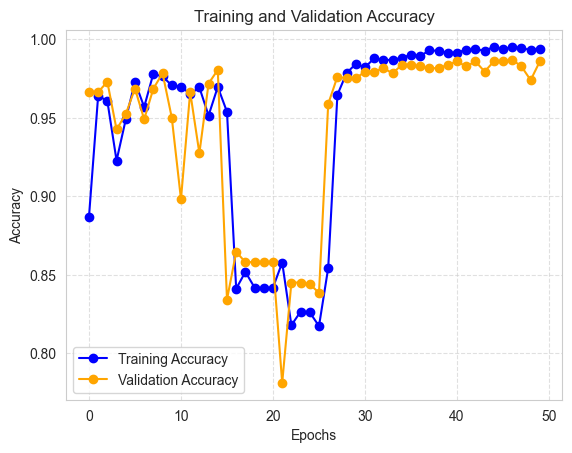

In [41]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange', marker='o')

plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

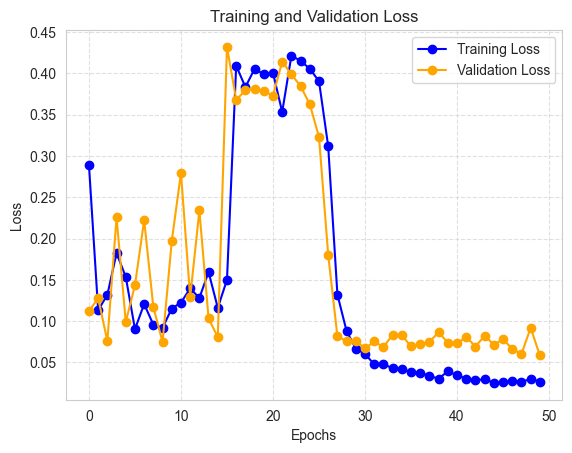

In [42]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss', color='blue', marker='o', linestyle='-')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange', marker='o', linestyle='-')

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()


51/51 [==============================] - 1s 11ms/step


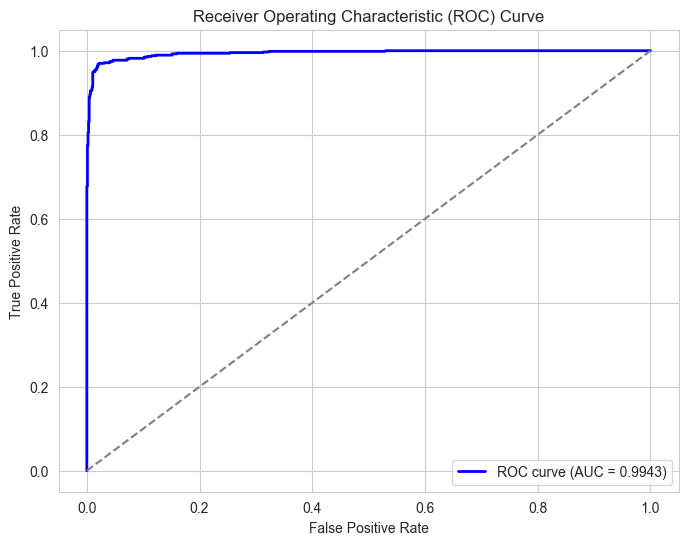

In [43]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming your LSTM model is named LSTM_Model
# Predict probabilities on the test data
y_pred_probs = LSTM_Model.predict(testing_padded).ravel()

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.4f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [44]:
from sklearn.metrics import classification_report
threshold = 0.5
y_pred_lstm = (LSTM_Model.predict(testing_padded) > threshold).astype(int)

report_lstm = classification_report(y_test, y_pred_lstm)

print("Classification Report for LSTM model:")
print(report_lstm)

51/51 [==============================] - 1s 11ms/step
Classification Report for LSTM model:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       953
           1       0.97      0.97      0.97       664

    accuracy                           0.97      1617
   macro avg       0.97      0.97      0.97      1617
weighted avg       0.97      0.97      0.97      1617


## Define the Bi-LSTM model architecture:

In [45]:
from keras.layers import Bidirectional

Bi_LSTM_Model = Sequential()
Bi_LSTM_Model.add(Embedding(vocab_size,
                     embedding_dim,
                     input_length = max_len))
Bi_LSTM_Model.add(Bidirectional(LSTM(n_lstm,
                              return_sequences = False)))
Bi_LSTM_Model.add(Dropout(drop_lstm))
Bi_LSTM_Model.add(Dense(1, activation='sigmoid'))

In [46]:
Bi_LSTM_Model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_13 (Embedding)    (None, 50, 16)            8000      
                                                                 
 bidirectional (Bidirection  (None, 256)               148480    
 al)                                                             
                                                                 
 dropout_13 (Dropout)        (None, 256)               0         
                                                                 
 dense_13 (Dense)            (None, 1)                 257       
                                                                 
Total params: 156737 (612.25 KB)
Trainable params: 156737 (612.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [47]:
Bi_LSTM_Model.compile(loss = 'binary_crossentropy',
               optimizer = 'adam',
               metrics=['accuracy'])

In [48]:
num_epochs = 50
early_stop = EarlyStopping(monitor = 'val_loss',
                           patience = 30)
history = Bi_LSTM_Model.fit(training_padded,
                     y_train,
                     epochs = num_epochs,
                     validation_data = (testing_padded, y_test),
                     callbacks = [early_stop],
                     verbose = 2)

Epoch 1/50
202/202 - 9s - loss: 0.3308 - accuracy: 0.8575 - val_loss: 0.1621 - val_accuracy: 0.9363 - 9s/epoch - 43ms/step
Epoch 2/50
202/202 - 7s - loss: 0.1126 - accuracy: 0.9623 - val_loss: 0.1215 - val_accuracy: 0.9555 - 7s/epoch - 34ms/step
Epoch 3/50
202/202 - 7s - loss: 0.0827 - accuracy: 0.9759 - val_loss: 0.1115 - val_accuracy: 0.9629 - 7s/epoch - 34ms/step
Epoch 4/50
202/202 - 7s - loss: 0.0581 - accuracy: 0.9817 - val_loss: 0.0893 - val_accuracy: 0.9685 - 7s/epoch - 34ms/step
Epoch 5/50
202/202 - 7s - loss: 0.0466 - accuracy: 0.9867 - val_loss: 0.1073 - val_accuracy: 0.9678 - 7s/epoch - 34ms/step
Epoch 6/50
202/202 - 7s - loss: 0.0401 - accuracy: 0.9884 - val_loss: 0.1022 - val_accuracy: 0.9709 - 7s/epoch - 34ms/step
Epoch 7/50
202/202 - 7s - loss: 0.0351 - accuracy: 0.9892 - val_loss: 0.1092 - val_accuracy: 0.9672 - 7s/epoch - 34ms/step
Epoch 8/50
202/202 - 7s - loss: 0.0310 - accuracy: 0.9913 - val_loss: 0.1170 - val_accuracy: 0.9691 - 7s/epoch - 34ms/step
Epoch 9/50
202/2

In [49]:
# model_path = 'C:\Shubh\IMP\Spam mail classification/Bi-LSTM_Model.keras'
# Bi_LSTM_Model.save(model_path)
# print("Model saved successfully.")

In [50]:
final_train_accuracy = history.history['accuracy'][-1]
final_val_accuracy = history.history['val_accuracy'][-1]

print(f'Final Training Accuracy: {final_train_accuracy:.4f}')
print(f'Final Validation Accuracy: {final_val_accuracy:.4f}')


Final Training Accuracy: 0.9980
Final Validation Accuracy: 0.9703


In [51]:
from sklearn.metrics import precision_score, recall_score, f1_score

y_pred_probs = Bi_LSTM_Model.predict(testing_padded)
threshold = 0.5
y_pred = (y_pred_probs > threshold).astype(int)
y_pred = y_pred.flatten()
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

51/51 [==============================] - 1s 14ms/step
Precision: 0.9583333333333334
Recall: 0.9698795180722891
F1 Score: 0.9640718562874252


**K 5**

In [52]:
from keras.layers import Bidirectional
# Define a function to create a Bidirectional LSTM model
def create_bidirectional_lstm_model(vocab_size, embedding_dim, max_len):
    n_lstm = 128
    drop_lstm = 0.2
    embedding_dim = 16
    model = Sequential()
    model.add(Embedding(vocab_size, embedding_dim, input_length=max_len))
    model.add(Bidirectional(LSTM(n_lstm, return_sequences=False)))
    model.add(Dropout(drop_lstm))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [53]:
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Embedding, SpatialDropout1D, GRU, Dropout, Dense
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5, shuffle=True)
cv_scores = []
early_stop = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)

In [54]:
for train_index, val_index in kfold.split(training_padded):
    X_train_fold, X_val_fold = training_padded[train_index], training_padded[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Create a Bidirectional LSTM model for this fold
    bi_lstm_model = create_bidirectional_lstm_model(vocab_size, embedding_dim, max_len)

    # Train the Bidirectional LSTM model on the training data for this fold
    history = bi_lstm_model.fit(X_train_fold, y_train_fold, epochs=50, batch_size=32, verbose=0,
                                validation_data=(X_val_fold, y_val_fold), callbacks=[early_stop])

    # Evaluate the Bidirectional LSTM model on the validation data for this fold and append the accuracy score
    scores = bi_lstm_model.evaluate(X_val_fold, y_val_fold, verbose=0)
    cv_scores.append(scores[1])


In [55]:
print("Cross Validation Scores:", cv_scores)
print("Average Cross Validation score:", np.mean(cv_scores))

Cross Validation Scores: [0.9837586879730225, 0.9845321178436279, 0.9775715470314026, 0.9775715470314026, 0.9783281683921814]
Average Cross Validation score: 0.9803524136543273


**K 7**

In [56]:
from keras.layers import Bidirectional
# Define a function to create a Bidirectional LSTM model
def create_bidirectional_lstm_model(vocab_size, embedding_dim, max_len):
    n_lstm = 128
    drop_lstm = 0.2
    embedding_dim = 16
    model = Sequential()
    model.add(Embedding(vocab_size, embedding_dim, input_length=max_len))
    model.add(Bidirectional(LSTM(n_lstm, return_sequences=False)))
    model.add(Dropout(drop_lstm))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [57]:
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Embedding, SpatialDropout1D, GRU, Dropout, Dense
from sklearn.model_selection import KFold
kfold = KFold(n_splits=7, shuffle=True)
cv_scores = []
early_stop = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)

In [58]:
for train_index, val_index in kfold.split(training_padded):
    X_train_fold, X_val_fold = training_padded[train_index], training_padded[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Create a Bidirectional LSTM model for this fold
    bi_lstm_model = create_bidirectional_lstm_model(vocab_size, embedding_dim, max_len)

    # Train the Bidirectional LSTM model on the training data for this fold
    history = bi_lstm_model.fit(X_train_fold, y_train_fold, epochs=50, batch_size=32, verbose=0,
                                validation_data=(X_val_fold, y_val_fold), callbacks=[early_stop])

    # Evaluate the Bidirectional LSTM model on the validation data for this fold and append the accuracy score
    scores = bi_lstm_model.evaluate(X_val_fold, y_val_fold, verbose=0)
    cv_scores.append(scores[1])


In [59]:
print("Cross Validation Scores:", cv_scores)
print("Average Cross Validation score:", np.mean(cv_scores))

Cross Validation Scores: [0.9783549904823303, 0.9859307408332825, 0.9870129823684692, 0.9837486743927002, 0.9869989156723022, 0.9880823493003845, 0.9848320484161377]
Average Cross Validation score: 0.9849943859236581


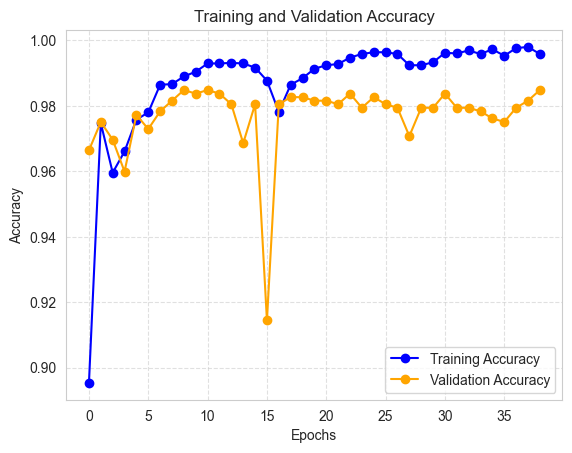

In [60]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange', marker='o')

plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

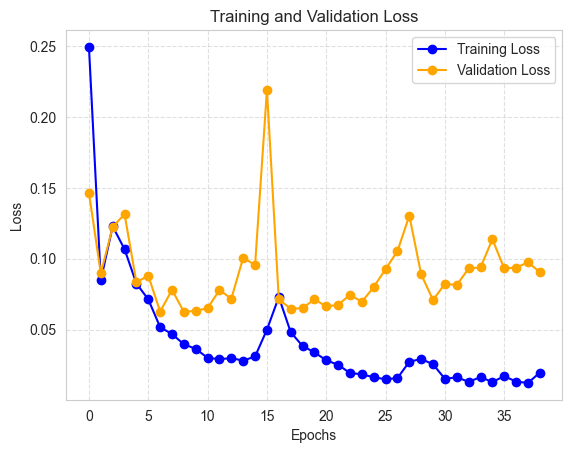

In [61]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss', color='blue', marker='o', linestyle='-')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange', marker='o', linestyle='-')

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()


51/51 [==============================] - 1s 14ms/step


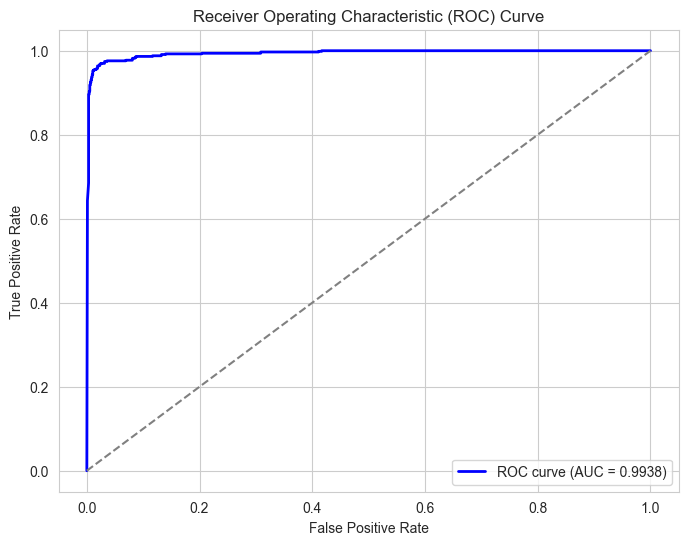

In [62]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming your Bi-LSTM model is named Bi_LSTM_Model
# Predict probabilities on the test data
y_pred_probs = Bi_LSTM_Model.predict(testing_padded).ravel()

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.4f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [63]:
from sklearn.metrics import classification_report
threshold = 0.5
y_pred_lstm = (Bi_LSTM_Model.predict(testing_padded) > threshold).astype(int)

report_lstm = classification_report(y_test, y_pred_lstm)

print("Classification Report for BI-LSTM model:")
print(report_lstm)

51/51 [==============================] - 1s 14ms/step
Classification Report for BI-LSTM model:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       953
           1       0.96      0.97      0.96       664

    accuracy                           0.97      1617
   macro avg       0.97      0.97      0.97      1617
weighted avg       0.97      0.97      0.97      1617


## Define the GRU model architecture:

In [64]:
from keras.layers import GRU

GRU_Model = Sequential()
GRU_Model.add(Embedding(vocab_size,
                     embedding_dim,
                     input_length = max_len))
GRU_Model.add(SpatialDropout1D(0.2))
GRU_Model.add(GRU(128, return_sequences = False))
GRU_Model.add(Dropout(0.2))
GRU_Model.add(Dense(1, activation = 'sigmoid'))

In [65]:
GRU_Model.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_26 (Embedding)    (None, 50, 16)            8000      
                                                                 
 spatial_dropout1d_13 (Spat  (None, 50, 16)            0         
 ialDropout1D)                                                   
                                                                 
 gru (GRU)                   (None, 128)               56064     
                                                                 
 dropout_26 (Dropout)        (None, 128)               0         
                                                                 
 dense_26 (Dense)            (None, 1)                 129       
                                                                 
Total params: 64193 (250.75 KB)
Trainable params: 64193 (250.75 KB)
Non-trainable params: 0 (0.00 Byte)
_______________

In [66]:
GRU_Model.compile(loss = 'binary_crossentropy',
                       optimizer = 'adam',
                       metrics=['accuracy'])

In [67]:
num_epochs = 50
early_stop = EarlyStopping(monitor='val_loss', patience=30)
history = GRU_Model.fit(training_padded,
                     y_train,
                     epochs=num_epochs,
                     validation_data=(testing_padded, y_test),
                     callbacks =[early_stop],
                     verbose=2)

Epoch 1/50
202/202 - 6s - loss: 0.3183 - accuracy: 0.8547 - val_loss: 0.1868 - val_accuracy: 0.9530 - 6s/epoch - 29ms/step
Epoch 2/50
202/202 - 4s - loss: 0.0994 - accuracy: 0.9714 - val_loss: 0.1061 - val_accuracy: 0.9660 - 4s/epoch - 22ms/step
Epoch 3/50
202/202 - 4s - loss: 0.0652 - accuracy: 0.9807 - val_loss: 0.1085 - val_accuracy: 0.9598 - 4s/epoch - 22ms/step
Epoch 4/50
202/202 - 5s - loss: 0.0555 - accuracy: 0.9828 - val_loss: 0.1119 - val_accuracy: 0.9685 - 5s/epoch - 23ms/step
Epoch 5/50
202/202 - 5s - loss: 0.0534 - accuracy: 0.9834 - val_loss: 0.1923 - val_accuracy: 0.9561 - 5s/epoch - 23ms/step
Epoch 6/50
202/202 - 4s - loss: 0.0495 - accuracy: 0.9865 - val_loss: 0.1627 - val_accuracy: 0.9400 - 4s/epoch - 22ms/step
Epoch 7/50
202/202 - 4s - loss: 0.0452 - accuracy: 0.9862 - val_loss: 0.0974 - val_accuracy: 0.9716 - 4s/epoch - 22ms/step
Epoch 8/50
202/202 - 4s - loss: 0.0497 - accuracy: 0.9872 - val_loss: 0.1012 - val_accuracy: 0.9728 - 4s/epoch - 21ms/step
Epoch 9/50
202/2

In [68]:
# model_path = 'C:\Shubh\IMP\Spam mail classification/GRU_Model.keras'
# GRU_Model.save(model_path)
# print("Model saved successfully.")

In [69]:
final_train_accuracy = history.history['accuracy'][-1]
final_val_accuracy = history.history['val_accuracy'][-1]

print(f'Final Training Accuracy: {final_train_accuracy:.4f}')
print(f'Final Validation Accuracy: {final_val_accuracy:.4f}')

Final Training Accuracy: 0.9968
Final Validation Accuracy: 0.9685


In [70]:
from sklearn.metrics import precision_score, recall_score, f1_score

y_pred_probs = GRU_Model.predict(testing_padded)
threshold = 0.5
y_pred = (y_pred_probs > threshold).astype(int)
y_pred = y_pred.flatten()
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

51/51 [==============================] - 1s 8ms/step
Precision: 0.9581464872944694
Recall: 0.9653614457831325
F1 Score: 0.9617404351087772


**K 5**

In [71]:
from keras.layers import GRU
from sklearn.model_selection import KFold
import numpy as np

In [72]:
def create_gru_model(vocab_size, embedding_dim, max_len):
    n_lstm = 128
    drop_lstm = 0.2
    embedding_dim = 16
    model = Sequential()
    model.add(Embedding(vocab_size, embedding_dim, input_length=max_len))
    model.add(SpatialDropout1D(0.2))
    model.add(GRU(128, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [73]:
kfold = KFold(n_splits=5, shuffle=True)
cv_scores = []
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Embedding, SpatialDropout1D, GRU, Dropout, Dense
from sklearn.model_selection import KFold
early_stop = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)

In [74]:
embedding_dim = 16
for train_index, val_index in kfold.split(training_padded):
    X_train_fold, X_val_fold = training_padded[train_index], training_padded[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Create a GRU model for this fold
    gru_model = create_gru_model(vocab_size, embedding_dim, max_len)

    # Train the GRU model on the training data for this fold
    history = gru_model.fit(X_train_fold, y_train_fold, epochs=50, batch_size=32, verbose=0,
                            validation_data=(X_val_fold, y_val_fold), callbacks=[early_stop])

    # Evaluate the GRU model on the validation data for this fold and append the accuracy score
    scores = gru_model.evaluate(X_val_fold, y_val_fold, verbose=0)
    cv_scores.append(scores[1])

In [75]:
print("Cross Validation Scores:", cv_scores)
print("Average Cross Validation score:", np.mean(cv_scores))

Cross Validation Scores: [0.9814385175704956, 0.9845321178436279, 0.9868522882461548, 0.9721577763557434, 0.9876161217689514]
Average Cross Validation score: 0.9825193643569946


**K 7**

In [76]:
def create_gru_model(vocab_size, embedding_dim, max_len):
    n_lstm = 128
    drop_lstm = 0.2
    embedding_dim = 16
    model = Sequential()
    model.add(Embedding(vocab_size, embedding_dim, input_length=max_len))
    model.add(SpatialDropout1D(0.2))
    model.add(GRU(128, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [77]:
kfold = KFold(n_splits=7, shuffle=True)
cv_scores = []
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Embedding, SpatialDropout1D, GRU, Dropout, Dense
from sklearn.model_selection import KFold
early_stop = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)

In [78]:
embedding_dim = 16
for train_index, val_index in kfold.split(training_padded):
    X_train_fold, X_val_fold = training_padded[train_index], training_padded[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Create a GRU model for this fold
    gru_model = create_gru_model(vocab_size, embedding_dim, max_len)

    # Train the GRU model on the training data for this fold
    history = gru_model.fit(X_train_fold, y_train_fold, epochs=50, batch_size=32, verbose=0,
                            validation_data=(X_val_fold, y_val_fold), callbacks=[early_stop])

    # Evaluate the GRU model on the validation data for this fold and append the accuracy score
    scores = gru_model.evaluate(X_val_fold, y_val_fold, verbose=0)
    cv_scores.append(scores[1])

In [79]:
print("Cross Validation Scores:", cv_scores)
print("Average Cross Validation score:", np.mean(cv_scores))

Cross Validation Scores: [0.9924242496490479, 0.9837662577629089, 0.9805194735527039, 0.9804983735084534, 0.98591548204422, 0.9804983735084534, 0.9653304219245911]
Average Cross Validation score: 0.9812789474214826


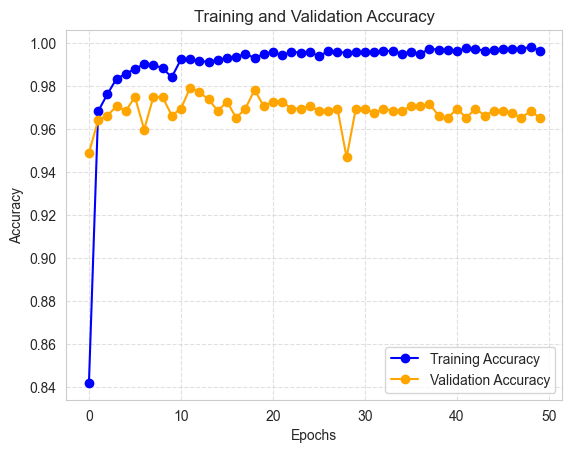

In [80]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange', marker='o')

plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()


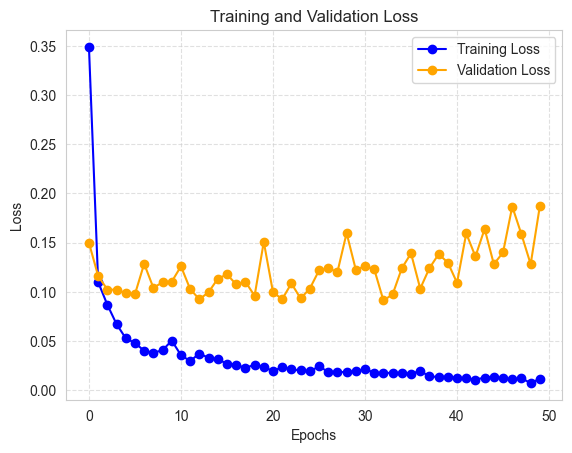

In [81]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss', color='blue', marker='o', linestyle='-')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange', marker='o', linestyle='-')

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()


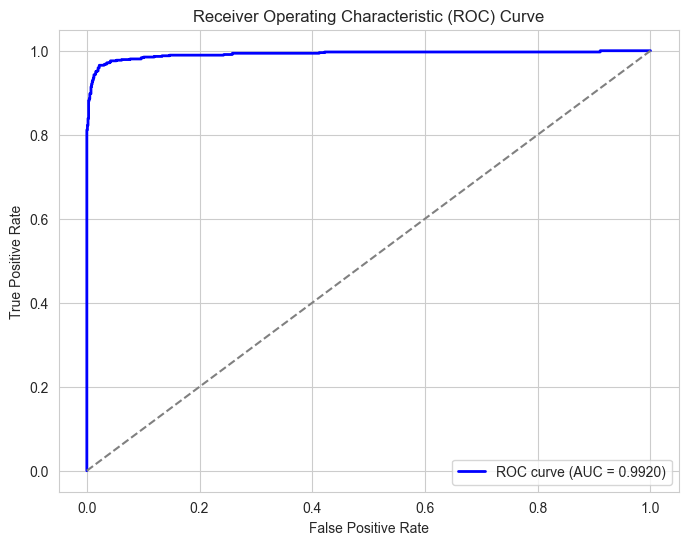

In [82]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.4f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [83]:
from sklearn.metrics import classification_report
threshold = 0.5
y_pred_lstm = (GRU_Model.predict(testing_padded) > threshold).astype(int)

report_lstm = classification_report(y_test, y_pred_lstm)

print("Classification Report for GRU model:")
print(report_lstm)

51/51 [==============================] - 0s 7ms/step
Classification Report for GRU model:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       953
           1       0.96      0.97      0.96       664

    accuracy                           0.97      1617
   macro avg       0.97      0.97      0.97      1617
weighted avg       0.97      0.97      0.97      1617


# Comparing the Three different models

In [84]:
print(f"LSTM model loss and accuracy: {LSTM_Model.evaluate(testing_padded, y_test)} " )
print(f"Bi-LSTM model loss and accuracy: {Bi_LSTM_Model.evaluate(testing_padded, y_test)} " )
print(f"GRU model loss and accuracy: {GRU_Model.evaluate(testing_padded, y_test)}")

51/51 [==============================] - 1s 10ms/step - loss: 0.1356 - accuracy: 0.9740
LSTM model loss and accuracy: [0.13555942475795746, 0.9740259647369385] 
51/51 [==============================] - 1s 13ms/step - loss: 0.1532 - accuracy: 0.9703
Bi-LSTM model loss and accuracy: [0.15320317447185516, 0.9703153967857361] 
51/51 [==============================] - 0s 7ms/step - loss: 0.1542 - accuracy: 0.9685
GRU model loss and accuracy: [0.15423305332660675, 0.9684600830078125]


51/51 [==============================] - 0s 7ms/step - loss: 0.1542 - accuracy: 0.9685


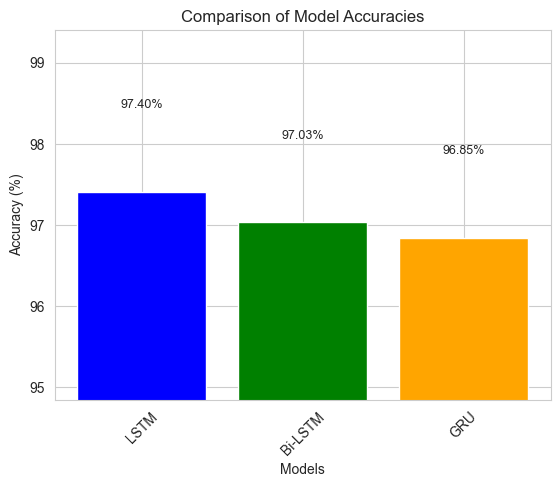

In [85]:
import matplotlib.pyplot as plt

lstm_accuracy = LSTM_Model.evaluate(testing_padded, y_test)[1]
bi_lstm_accuracy = Bi_LSTM_Model.evaluate(testing_padded, y_test)[1]
gru_accuracy = GRU_Model.evaluate(testing_padded, y_test)[1]

lstm_accuracy_percentage = lstm_accuracy * 100
bi_lstm_accuracy_percentage = bi_lstm_accuracy * 100
gru_accuracy_percentage = gru_accuracy * 100

models = ['LSTM', 'Bi-LSTM', 'GRU']
accuracies = [lstm_accuracy_percentage, bi_lstm_accuracy_percentage, gru_accuracy_percentage]

colors = ['blue', 'green', 'orange']

plt.bar(models, accuracies, color=colors)

plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Comparison of Model Accuracies')

plt.ylim(min(accuracies) - 2, max(accuracies) + 2)

plt.xticks(rotation=45)

for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy + 1, f'{accuracy:.2f}%', ha='center', va='bottom', fontsize=9)

plt.show()


51/51 [==============================] - 0s 7ms/step - loss: 0.1542 - accuracy: 0.9685


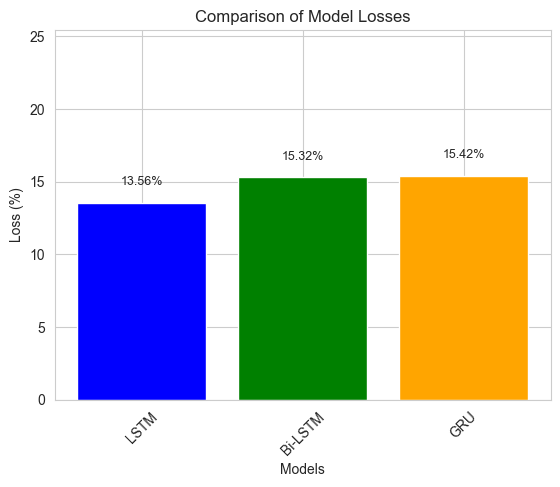

In [86]:
import matplotlib.pyplot as plt

lstm_loss = LSTM_Model.evaluate(testing_padded, y_test)[0]
bi_lstm_loss = Bi_LSTM_Model.evaluate(testing_padded, y_test)[0]
gru_loss = GRU_Model.evaluate(testing_padded, y_test)[0]

lstm_loss_percentage = lstm_loss * 100
bi_lstm_loss_percentage = bi_lstm_loss * 100
gru_loss_percentage = gru_loss * 100

models = ['LSTM', 'Bi-LSTM', 'GRU']
losses = [lstm_loss_percentage, bi_lstm_loss_percentage, gru_loss_percentage]

colors = ['blue', 'green', 'orange']

plt.bar(models, losses, color=colors)

plt.xlabel('Models')
plt.ylabel('Loss (%)')
plt.title('Comparison of Model Losses')

plt.ylim(0, max(losses) + 10)

plt.xticks(rotation=45)

for i, loss in enumerate(losses):
    plt.text(i, loss + 1, f'{loss:.2f}%', ha='center', va='bottom', fontsize=9)

plt.show()


51/51 [==============================] - 0s 7ms/step


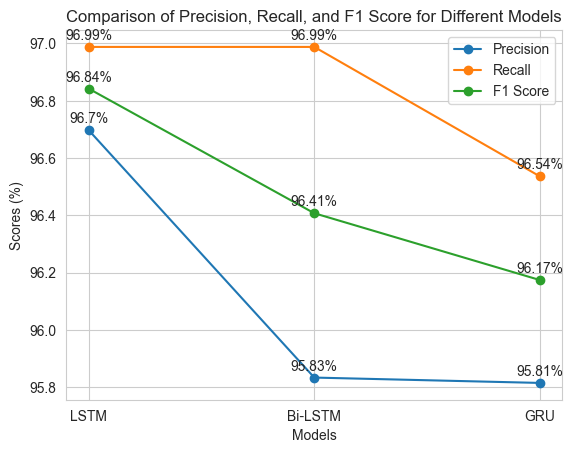

In [87]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

models = [LSTM_Model, Bi_LSTM_Model, GRU_Model]
model_names = ['LSTM', 'Bi-LSTM', 'GRU']

precision_scores = []
recall_scores = []
f1_scores = []

for model, name in zip(models, model_names):
    y_pred_probs = model.predict(testing_padded)
    threshold = 0.5
    y_pred = (y_pred_probs > threshold).astype(int)
    y_pred = y_pred.flatten()

    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    precision_scores.append(precision * 100)
    recall_scores.append(recall * 100)
    f1_scores.append(f1 * 100)

index = np.arange(len(model_names))

fig, ax = plt.subplots()

ax.plot(index, precision_scores, marker='o', label='Precision')

ax.plot(index, recall_scores, marker='o', label='Recall')

ax.plot(index, f1_scores, marker='o', label='F1 Score')

ax.set_xlabel('Models')
ax.set_ylabel('Scores (%)')
ax.set_title('Comparison of Precision, Recall, and F1 Score for Different Models')
ax.set_xticks(index)
ax.set_xticklabels(model_names)
ax.legend()

def annotate_scores(scores, offset):
    for i, score in enumerate(scores):
        ax.annotate('{}%'.format(round(score, 2)),
                    xy=(index[i], score),
                    xytext=(0, offset),
                    textcoords="offset points",
                    ha='center', va='bottom')

annotate_scores(precision_scores, 3)
annotate_scores(recall_scores, 3)
annotate_scores(f1_scores, 3)

plt.show()


## Predict the Ham or Spam for the new messages

In [90]:
import pickle
from keras.preprocessing.sequence import pad_sequences

models = [("LSTM", LSTM_Model), ("Bi-LSTM", Bi_LSTM_Model), ("GRU", GRU_Model)]

user_input = input("Enter the message to predict: ")
predict_msg = [user_input]

def predict_spam(model, predict_msg):
    new_seq = tokenizer.texts_to_sequences(predict_msg)
    padded = pad_sequences(new_seq, padding=padding_type, truncating=trunc_type, maxlen=max_len)
    return model.predict(padded)

max_accuracy = 0.0
selected_model_info = None

for model_name, current_model in models:
    result = predict_spam(current_model, predict_msg)
    current_accuracy = result[0][0]

    if current_accuracy > max_accuracy:
        max_accuracy = current_accuracy
        selected_model_info = (model_name, current_model)

result = predict_spam(selected_model_info[1], predict_msg)

threshold = 0.5

if result > threshold:
    print(f'{user_input}')
    print("Spam")
else:
    print(f'{user_input}')
    print("Not Spam")

print(f"Selected Model: {selected_model_info[0]}")

1/1 [==============================] - 0s 28ms/step
hi i am ayush this side shubham
Not Spam
Selected Model: LSTM


In [89]:
import pickle
from keras.preprocessing.sequence import pad_sequences

models = [("LSTM", LSTM_Model), ("Bi-LSTM", Bi_LSTM_Model), ("GRU", GRU_Model)]

user_input = input("Enter the message to predict: ")
predict_msg = [user_input]

def predict_spam(model, predict_msg):
    new_seq = tokenizer.texts_to_sequences(predict_msg)
    padded = pad_sequences(new_seq, padding=padding_type, truncating=trunc_type, maxlen=max_len)
    return model.predict(padded)

max_accuracy = 0.0
selected_model_info = None

for model_name, current_model in models:
    result = predict_spam(current_model, predict_msg)
    current_accuracy = result[0][0]

    if current_accuracy > max_accuracy:
        max_accuracy = current_accuracy
        selected_model_info = (model_name, current_model)

result = predict_spam(selected_model_info[1], predict_msg)

threshold = 0.5

if result > threshold:
    print(f'{user_input}')
    print("Spam")
else:
    print(f'{user_input}')
    print("Not Spam")

print(f"Selected Model: {selected_model_info[0]}")

1/1 [==============================] - 0s 23ms/step
free free free you won a car click on the link below
Spam
Selected Model: Bi-LSTM
